# Tensorflow 簡易教學與實作

Tensorflow 是由 Google 所發布的深度學習套件，讓開發者可以自行設計神經網路的架構。其優點在於在設計神經網路上非常靈活，相較於其他深度學習套件，開發者對於神經網路的運作，有較全面的掌控，而缺點則是入門門檻較高。

## 1. 兩種 tensor

Tensor 在數學上的意義是任意維度的矩陣，從數學來看，**神經網路就是由許多的 tensor 所組成**。考慮以下一層神經網路的數學式：

$y = activation(x \times weight + bias)$

在建構神經網路模型的過程中，必須不斷從資料中取出一部分的 `X` 跟 `Y` 來訓練神經網路，更新 `Weight` 跟 `Bias`。從訓練模型的角度來說，`X` 跟 `Y` 是輸入，而 `Weight` 與 `Bias` 是輸出。為了因應上述的特性，Tensorflow 提供了兩種不同特性的 tensor：

1. tensorflow.placeholder()：其值從外部輸入，對應 `X` 與 `Y`。
2. tensorflow.Variable()：其值在訓練過程自動更新，對應 `Weight` 與 `Bias`。

接下來會介紹這兩種 tensor 的用法，在介紹之前，先定義兩個名詞：

1. tensor：任意維度的矩陣。
2. shape：tensor 在每一維度上的大小。

### 1.1 tensorflow.placeholder()

這種 tensor 用來存放外部輸入的資料，在訓練時過程中不會被更新，用法如下：

In [2]:
import tensorflow as tf

a = tf.placeholder(tf.float32, shape = (3, 2))

print(a)

Tensor("Placeholder:0", shape=(3, 2), dtype=float32)


如此產生了一個 shape 為 (3, 2) 但是沒有任何數值內容的 tensor，而給值的方法會在下一小節探討。在實務上，每次輸入的資料筆數不一定相同，因此 `tf.placeholder()` 也可以產生連 shape 都不明確的 tensor：

In [3]:
b = tf.placeholder(tf.float32, shape = (None, 2))

print(b)

Tensor("Placeholder_1:0", shape=(?, 2), dtype=float32)


`b` 之後可以放入 shape 為 `(n, 2)` 的矩陣，這裡 `n` 就是一次訓練所使用的資料筆數。

### 1.2 tensorflow.Variable()

這種 tensor 的特性是在神經網路訓練過程中，其值會自動被更新。實務上會用這種 tensor 來存放神經網路的 `Weight` 跟 `Bias`，其具體用法如下：

In [4]:
a = tf.Variable([1, 2, 3])
b = tf.Variable([[2, 4], [6, 8], [10, 12]])

print(a)
print(b)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32_ref>
<tf.Variable 'Variable_1:0' shape=(3, 2) dtype=int32_ref>


上面的程式碼產生了一個 1 維 tensor 與一個 2 維 tensor，其中初始值各為：

$
a = 
\begin{bmatrix}
    1 & 2 & 3
\end{bmatrix}
$

$
b = 
\begin{bmatrix}
    2 & 4 \\
    6 & 8 \\
    10 & 12
\end{bmatrix}
$

一般神經網路中 `Weight` 與 `Bias` 的初始值是隨機指定，`tf.Variable()` 也提供這樣的初始化方式：

In [5]:
c = tf.Variable(tf.random_uniform(shape = (3, 2)))

print(c)

<tf.Variable 'Variable_2:0' shape=(3, 2) dtype=float32_ref>


## 2. 獲取 tensor 的值

從上面的例子可以注意到 tensor 的值沒辦法透過 print() 來查看，那是因為在 Tensorflow 的架構中，tensor 的值要等到訓練開始之後才會填入，這節將介紹如何訓練神經網路，並獲取其中 tensor 的值。

### 3.1 tensorflow.Session()

執行一個神經網路。將整個網路的最後一個 tensor 傳給 `tf.Session()`，它會自動執行這個 tensor 以前的所有網路，並回傳執行後這個 tensor 的值。具體用法如下：

In [6]:
a = tf.placeholder(tf.int32, shape = (2, 2))
b = tf.placeholder(tf.int32, shape = (None, 2))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

a_value_1 = sess.run(a, feed_dict = {a: [[1,2],[3,4]]})
a_value_2 = sess.run(a, feed_dict = {a: [[5,6],[7,8]]})

# shape = (2, 2)
b_value_1 = sess.run(b, feed_dict = {b: [[1,2],[3,4]]})

# shape = (3, 2)
b_value_2 = sess.run(b, feed_dict = {b: [[5,6],[7,8], [9, 10]]})

print(a_value_1)
print(a_value_2)

print(b_value_1)
print(b_value_2)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[1 2]
 [3 4]]
[[ 5  6]
 [ 7  8]
 [ 9 10]]


從上面程式碼可以看到，`tf.placeholder()` 透過 `sess.run()` 中的 feed_dict 的參數給值。注意由於 `b` 一開始 shape 為 `(None, 2)`，所以可以給它 (2, 2) 或 (3, 2) 等不同 shape 的矩陣。接著是查看 `tf.Variable()` 的方法：

In [7]:
a = tf.Variable([1, 2, 3])
b = tf.Variable(tf.random_uniform(shape = (3, 2)))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

a_value = sess.run(a)
b_value = sess.run(b)

print(a_value)
print(b_value)

[1 2 3]
[[ 0.62298906  0.20584846]
 [ 0.65348887  0.70709825]
 [ 0.7138288   0.15067267]]


可以注意到由於 `b` 是使用隨機初始的方式，所以值為亂數。

## 3. 矩陣運算

### 3.1 線性計算

神經網路每層在經過激活(activate)之前會有一個矩陣運算：

$y = x \times weight + bias$

這條數學式中用到了矩陣乘法跟矩陣加法，而 Tensorflow 中可以使用 `tf.matmul()` 做矩陣乘法，使用 + 做矩陣加法，具體程式碼如下：

In [8]:
x = tf.placeholder(tf.int32, shape = (1, 3))
weight = tf.Variable([[1, -2], [3, -4], [5, -6]])
bias = tf.Variable([1, 2])

y = tf.matmul(x, weight) + bias

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(y, feed_dict = {x: [[1, 2, 3]]}))

[[ 23 -26]]


上面的程式碼對應的數學式如下：

$
y = 
\begin{bmatrix}
    1 & 2 & 3
\end{bmatrix}
\times
\begin{bmatrix}
    1 & -2 \\
    3 & -4 \\
    5 & -6
\end{bmatrix}
+
\begin{bmatrix}
    1 & 2
\end{bmatrix}
$

計算出來 `y` 為 $[23, -26]$。

### 3.2 激活函數

神經網路每層線性的矩陣運算後，還會經過一個激活函數。Tensorflow 提供許多激活函數供開發者使用。具體程式碼如下：

In [9]:
x = tf.placeholder(tf.int32, shape = (1, 3))
weight = tf.Variable([[1, -2], [3, -4], [5, -6]])
bias = tf.Variable([1, 2])

y = tf.matmul(x, weight) + bias

# 使用 Relu 激活函數
activate = tf.nn.relu(y)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(activate, feed_dict = {x: [[1, 2, 3]]}))

[[23  0]]


上面的程式碼使用了 `tf.nn.relu()` 來做為激活函數。輸入值小於 0 時，relu 會輸出 0；輸入值大於 0 時，relu 會輸出輸入值。所以將 relu 將[23, -26] 變成 [23, 0]。試著將 `tf.nn.relu()` 替換成另外兩個常見的激活函數，並觀察輸出：

1. `tf.nn.sigmoid()`
2. `tf.nn.tanh()`

有了以上觀念後，可以用 Tensorflow，試著接出以下的數學式：

$$
x = 
\begin{bmatrix}
    1 & 2 & 3
\end{bmatrix}
$$

$$
h = x \times
\begin{bmatrix}
    1 & -2 \\
    3 & -4 \\
    5 & -6
\end{bmatrix}
+
\begin{bmatrix}
    1 & 2
\end{bmatrix}
$$

$$
activate = relu(h)
$$

$$
y = activate \times
\begin{bmatrix}
    5 & 7 \\
    6 & 8 \\
\end{bmatrix}
+
\begin{bmatrix}
    3 & 3
\end{bmatrix}
$$

以下程式區塊可供使用：

## 4. 神經網路

上一小節說明了如何用 Tensorflow 建構神經網路，接著要利用 MNIST 資料集來訓練一個可以辨識手寫數字的神經網路。

### 4.1 MNIST 資料集 

[MNIST 資料集](http://yann.lecun.com/exdb/mnist/) 裡面總共有 70000 張手寫數字圖片，每一張皆為 28 pixels x 28 pixels 的黑白圖片。在 Tensorflow 中取得 MNIST 資料集的程式碼如下：

In [10]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

# 從訓練資料中隨機拿取 100 張圖片以及其對應的標籤
x_batch, y_batch = mnist.train.next_batch(100)

# 取得所有測試用資料的照片
full_test_data_images = mnist.test.images

# 取得所有測試用資料的標籤
full_test_data_labels = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

可以看看 MNIST 資料集的內容：

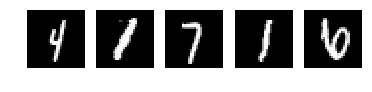

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

trainimg = mnist.train.images
trainlabel = mnist.train.labels

fig = plt.figure()

for i in range(5):
    curr_img   = np.reshape(trainimg[i, :], (28, 28))
    curr_label = np.argmax(trainlabel[i, :] )
    
    fig.add_subplot(1, 5, i + 1)
    plt.imshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.axis('off')
 
plt.show()

來看看資料的 shape：

In [11]:
x_batch, y_batch = mnist.train.next_batch(100)

print(x_batch.shape)
print(y_batch.shape)

(100, 784)
(100, 10)


我們一次只拿出 100 筆資料，所以 shape 的第一個維度為 100。每張圖片的有 28 x 28 = 784 個像素值，所以 `x_batch` 的第二個維度為 784。標籤可能為 0~9 共 10 個類別，經過 one-hot 編碼後會是 10 維，所以 `y_batch` 的第二個維度為 10。

### 4.2 訓練神經網路

以下為訓練神經網路的程式碼：

In [12]:
x = tf.placeholder(tf.float32, shape = (None, 784))
y = tf.placeholder(tf.float32, shape = (None, 10))

# 神經網路第一層
layer_1_weight = tf.Variable(tf.random_uniform(shape = (784, 100)))
layer_1_bias = tf.Variable(tf.random_uniform(shape = (100, )))

layer_1_output = tf.nn.sigmoid(tf.matmul(x, layer_1_weight) + layer_1_bias)

# 神經網路第二層
layer_2_weight = tf.Variable(tf.random_uniform(shape = (100, 10)))
layer_2_bias = tf.Variable(tf.random_uniform(shape = (10, )))

layer_2_output = tf.matmul(layer_1_output, layer_2_weight) + layer_2_bias

# 定義 loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = layer_2_output))

# 定義 accuracy
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(layer_2_output, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 定義 optimizer 以及 learning rate
train_step = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 訓練 2000 次
for i in range(1, 2001):
    
    # 每次訓練隨機選 100 筆資料放進神經網路
    x_batch, y_batch = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict = {x: x_batch, y: y_batch})
    
    # 每訓練 100 次查看一次目前的 loss
    if i % 100 == 0:
        print('Step %d training loss %.6f' % (i, sess.run(loss, feed_dict = {x: mnist.train.images, y: mnist.train.labels})))
        
# 查看訓練完後的神經網路的準確率
print('=================')
print('Test accuracy: %.6f' % sess.run(accuracy, feed_dict = {x: mnist.test.images, y: mnist.test.labels}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Step 100 training loss 2.306363
Step 200 training loss 2.311510
Step 300 training loss 2.307052
Step 400 training loss 2.315013
Step 500 training loss 2.305404
Step 600 training loss 2.306050
Step 700 training loss 2.308618
Step 800 training loss 2.317197
Step 900 training loss 2.304279
Step 1000 training loss 2.275578
Step 1100 training loss 2.247457
Step 1200 training loss 2.156875
Step 1300 training loss 2.049428
Step 1400 training loss 1.916977
Step 1500 training loss 1.796522
Step 1600 training loss 1.687458
Step 1700 training loss 1.591968
Step 1800 training loss 1.500966
Step 1900 training loss 1.407697
Step 2000 training loss 1.281204
Test accuracy: 0.693800


可以看到以上的神經網路最後的準確率大約在 0.7 到 0.8，然而神經網路在 MNIST 上的準確率是可以到達 0.95 以上的，所以接下來請隨意修改上面的程式碼，使其準確率可以超過 0.9

提示：

- 增加神經網路的層數
- 增加神經網路每層的神經元數量
- 換一個激活函數
- 調整 learning rate
- 訓練久一點